Here we are analyzing the difference between sequential observations. While an attacker's perturbations should be within the distribution to avoid detection, the ATLA adversary should use the max values to simulate the worst case scenario (the innmax of our minmax).

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_bline = pd.read_csv('baseline_obs.csv',
                       index_col=0,)

Here is the max and mean change between samples for each feature

In [3]:
df_diff = df_bline.diff().abs().agg(['max', 'mean'])
df_diff

,month_cos,month_sin,day_type_cos,day_type_sin,hour_cos,hour_sin,outdoor_dry_bulb_temperature,outdoor_dry_bulb_temperature_predicted_6h,outdoor_dry_bulb_temperature_predicted_12h,outdoor_dry_bulb_temperature_predicted_24h,...,direct_solar_irradiance_predicted_24h,carbon_intensity,non_shiftable_load,solar_generation,electrical_storage_soc,net_electricity_consumption,electricity_pricing,electricity_pricing_predicted_6h,electricity_pricing_predicted_12h,electricity_pricing_predicted_24h
max,0.250000,0.250000,0.353553,0.707107,0.129410,0.129410,0.293233,0.293233,0.293233,0.293233,...,0.825813,0.308826,0.672154,0.002795,0.556263,0.005880,0.969697,0.969697,0.969697,0.969697
mean,0.000228,0.000228,0.010136,0.011956,0.083345,0.083324,0.026327,0.026330,0.026328,0.026325,...,0.070241,0.026802,0.060263,0.000258,0.081668,0.000644,0.072495,0.072495,0.072495,0.072495


In [4]:
df_diff.loc['mean'].sort_values()

month_cos                                     0.000228
month_sin                                     0.000228
solar_generation                              0.000258
net_electricity_consumption                   0.000644
day_type_cos                                  0.010136
day_type_sin                                  0.011956
outdoor_dry_bulb_temperature_predicted_24h    0.026325
outdoor_dry_bulb_temperature                  0.026327
outdoor_dry_bulb_temperature_predicted_12h    0.026328
outdoor_dry_bulb_temperature_predicted_6h     0.026330
carbon_intensity                              0.026802
outdoor_relative_humidity_predicted_24h       0.049118
outdoor_relative_humidity                     0.049118
outdoor_relative_humidity_predicted_12h       0.049122
outdoor_relative_humidity_predicted_6h        0.049125
non_shiftable_load                            0.060263
diffuse_solar_irradiance_predicted_12h        0.063004
diffuse_solar_irradiance_predicted_6h         0.063022
diffuse_so

In [20]:
df_diff.mean()

month_cos                                     0.125114
month_sin                                     0.125114
day_type_cos                                  0.181845
day_type_sin                                  0.359531
hour_cos                                      0.106377
hour_sin                                      0.106367
outdoor_dry_bulb_temperature                  0.159780
outdoor_dry_bulb_temperature_predicted_6h     0.159782
outdoor_dry_bulb_temperature_predicted_12h    0.159781
outdoor_dry_bulb_temperature_predicted_24h    0.159779
outdoor_relative_humidity                     0.363448
outdoor_relative_humidity_predicted_6h        0.363451
outdoor_relative_humidity_predicted_12h       0.363450
outdoor_relative_humidity_predicted_24h       0.363448
diffuse_solar_irradiance                      0.326006
diffuse_solar_irradiance_predicted_6h         0.326005
diffuse_solar_irradiance_predicted_12h        0.325996
diffuse_solar_irradiance_predicted_24h        0.326006
direct_sol

df_diff.mean().sort_values()

In [19]:
df_diff.mean().values

array([0.12511418, 0.12511418, 0.18184461, 0.35953119, 0.10637713,
       0.10636668, 0.15978021, 0.15978171, 0.15978064, 0.15977914,
       0.36344801, 0.36345118, 0.36344991, 0.36344801, 0.3260062 ,
       0.3260048 , 0.32599576, 0.3260062 , 0.44802713, 0.44802114,
       0.44802228, 0.44802713, 0.16781362, 0.36620854, 0.00152669,
       0.31896562, 0.00326229, 0.52109586, 0.52109586, 0.52109586,
       0.52109586])

Here's the difference between the mean and max values

In [6]:
(df_diff.loc['max'] - df_diff.loc['mean']).abs()

month_cos                                     0.249772
month_sin                                     0.249772
day_type_cos                                  0.343418
day_type_sin                                  0.695151
hour_cos                                      0.046065
hour_sin                                      0.046086
outdoor_dry_bulb_temperature                  0.266906
outdoor_dry_bulb_temperature_predicted_6h     0.266903
outdoor_dry_bulb_temperature_predicted_12h    0.266905
outdoor_dry_bulb_temperature_predicted_24h    0.266908
outdoor_relative_humidity                     0.628659
outdoor_relative_humidity_predicted_6h        0.628653
outdoor_relative_humidity_predicted_12h       0.628656
outdoor_relative_humidity_predicted_24h       0.628659
diffuse_solar_irradiance                      0.525962
diffuse_solar_irradiance_predicted_6h         0.525965
diffuse_solar_irradiance_predicted_12h        0.525983
diffuse_solar_irradiance_predicted_24h        0.525962
direct_sol

In [7]:
(df_diff.loc['max'] - df_diff.loc['mean']).abs().values

array([0.24977164, 0.24977164, 0.34341758, 0.69515118, 0.04606484,
       0.04608573, 0.26690566, 0.26690266, 0.2669048 , 0.26690781,
       0.62865948, 0.62865314, 0.62865568, 0.62865948, 0.52596206,
       0.52596487, 0.52598294, 0.52596206, 0.75557218, 0.75558416,
       0.75558188, 0.75557218, 0.28202381, 0.61189055, 0.00253725,
       0.47459565, 0.0052361 , 0.89720221, 0.89720221, 0.89720221,
       0.89720221])

In [8]:
df_bline.columns

Index(['month_cos', 'month_sin', 'day_type_cos', 'day_type_sin', 'hour_cos',
       'hour_sin', 'outdoor_dry_bulb_temperature',
       'outdoor_dry_bulb_temperature_predicted_6h',
       'outdoor_dry_bulb_temperature_predicted_12h',
       'outdoor_dry_bulb_temperature_predicted_24h',
       'outdoor_relative_humidity', 'outdoor_relative_humidity_predicted_6h',
       'outdoor_relative_humidity_predicted_12h',
       'outdoor_relative_humidity_predicted_24h', 'diffuse_solar_irradiance',
       'diffuse_solar_irradiance_predicted_6h',
       'diffuse_solar_irradiance_predicted_12h',
       'diffuse_solar_irradiance_predicted_24h', 'direct_solar_irradiance',
       'direct_solar_irradiance_predicted_6h',
       'direct_solar_irradiance_predicted_12h',
       'direct_solar_irradiance_predicted_24h', 'carbon_intensity',
       'non_shiftable_load', 'solar_generation', 'electrical_storage_soc',
       'net_electricity_consumption', 'electricity_pricing',
       'electricity_pricing_predicte

We see that temperature typically varies by 2-3% between observations, but up to 30.

In [9]:
df_bline[df_bline.columns[df_bline.columns.str.contains('temperature')]].diff().abs().describe()

,outdoor_dry_bulb_temperature,outdoor_dry_bulb_temperature_predicted_6h,outdoor_dry_bulb_temperature_predicted_12h,outdoor_dry_bulb_temperature_predicted_24h
count,8758.000000,8758.000000,8758.000000,8758.000000
mean,0.026327,0.026330,0.026328,0.026325
std,0.028202,0.028201,0.028202,0.028202
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.022556,0.022556,0.022556,0.022556
75%,0.041353,0.041353,0.041353,0.041353
max,0.293233,0.293233,0.293233,0.293233


<Axes: >

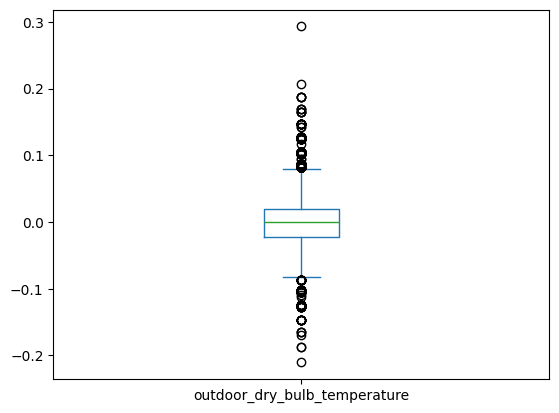

In [10]:
df_bline['outdoor_dry_bulb_temperature'].diff().plot.box()

In [11]:
df_bline[df_bline.columns[df_bline.columns.str.contains('humidity')]].diff().abs().describe()

,outdoor_relative_humidity,outdoor_relative_humidity_predicted_6h,outdoor_relative_humidity_predicted_12h,outdoor_relative_humidity_predicted_24h
count,8758.000000,8758.000000,8758.000000,8758.000000
mean,0.049118,0.049125,0.049122,0.049118
std,0.063816,0.063817,0.063819,0.063816
min,0.000000,0.000000,0.000000,0.000000
25%,0.011111,0.011111,0.011111,0.011111
50%,0.033333,0.033333,0.033333,0.033333
75%,0.066667,0.066667,0.066667,0.066667
max,0.677778,0.677778,0.677778,0.677778


<Axes: >

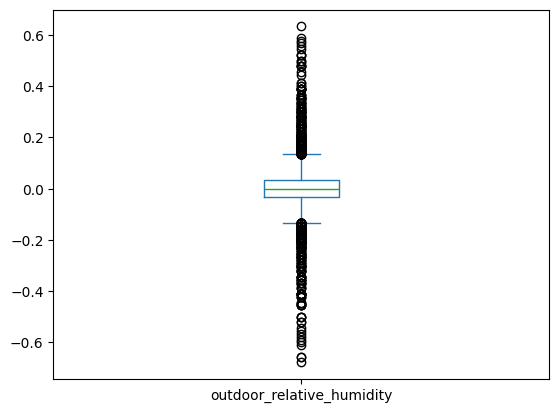

In [12]:
df_bline['outdoor_relative_humidity'].diff().plot.box()

In [13]:
df_bline[df_bline.columns[df_bline.columns.str.contains('solar_irradiance')]].diff().abs().describe()

,diffuse_solar_irradiance,diffuse_solar_irradiance_predicted_6h,diffuse_solar_irradiance_predicted_12h,diffuse_solar_irradiance_predicted_24h,direct_solar_irradiance,direct_solar_irradiance_predicted_6h,direct_solar_irradiance_predicted_12h,direct_solar_irradiance_predicted_24h
count,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000
mean,0.063025,0.063022,0.063004,0.063025,0.070241,0.070229,0.070231,0.070241
std,0.082913,0.082915,0.082916,0.082913,0.117879,0.117880,0.117881,0.117879
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.015733,0.015733,0.015733,0.015733,0.002099,0.002099,0.002099,0.002099
75%,0.118977,0.118977,0.118977,0.118977,0.098636,0.098636,0.098636,0.098636
max,0.588987,0.588987,0.588987,0.588987,0.825813,0.825813,0.825813,0.825813


<Axes: >

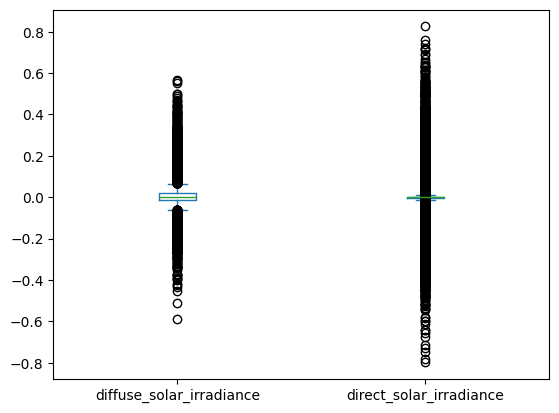

In [14]:
df_bline[['diffuse_solar_irradiance','direct_solar_irradiance']].diff().plot.box()

In [15]:
df_bline[df_bline.columns[df_bline.columns.str.contains('carbon_intensity|non_shiftable_load|solar_generation|electrical_storage_soc|net_electricity_consumption')]].diff().abs().describe()

,carbon_intensity,non_shiftable_load,solar_generation,electrical_storage_soc,net_electricity_consumption
count,8.758000e+03,8758.000000,8758.000000,8758.000000,8758.000000
mean,2.680171e-02,0.060263,0.000258,0.081668,0.000644
std,2.524626e-02,0.078936,0.000359,0.087068,0.000659
min,2.600000e-07,0.000000,0.000000,0.000000,0.000000
25%,8.014512e-03,0.007470,0.000000,0.000097,0.000172
50%,1.878601e-02,0.033315,0.000027,0.045133,0.000452
75%,3.824307e-02,0.075898,0.000479,0.135400,0.000892
max,3.088255e-01,0.672154,0.002795,0.556263,0.005880


<Axes: >

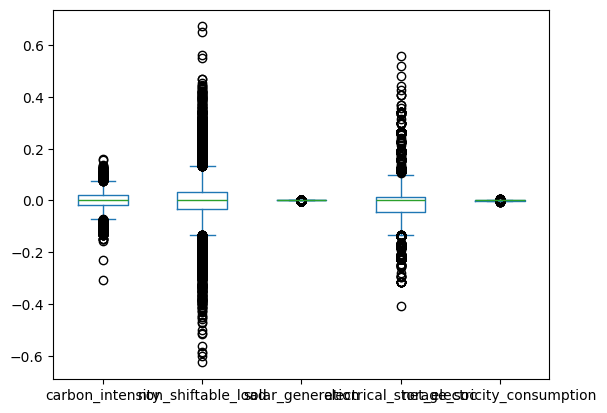

In [16]:
df_bline[['carbon_intensity',
       'non_shiftable_load', 'solar_generation', 'electrical_storage_soc',
       'net_electricity_consumption']].diff().plot.box()